# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Proyecto

La retención de clientes es un factor clave para el crecimiento sostenible de cualquier negocio. En este análisis, exploramos los factores que influyen en la cancelación de membresías en Model Fitness, utilizando datos de 4000 clientes.

## Exploración de Datos (EDA)

### Carga de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# Cargar los datos
df = pd.read_csv('/datasets/gym_churn_us.csv')

# Analizar los datos (EDA)
print(df.info())
print(df.isna().sum())  
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

El conjunto de datos tiene 4000 registros y 14 columnas , sin valores nulos. El método df.describe() da información clave:

    Edad promedio: 29 años (rango de 18 a 41).
    Tiempo de membresía promedio: 3.72 meses.
    Periodo de contrato promedio: 4,68 meses.
    Gasto en servicios adicionales: $146.94 en promedio.
    Frecuencia promedio de clases por semana: 1.88 en toda la vida del cliente y 1.76 en el mes actual.
    Churn (cancelación): El 26.5% de los clientes se dieron de baja.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Buen comienzo! Has cargado correctamente los datos, verificado su estructura y ausencia de valores nulos. Además, la exploración inicial con `.describe()` proporciona información clave sobre las características de los clientes y su comportamiento. 
</div>

## Visualización de datos 

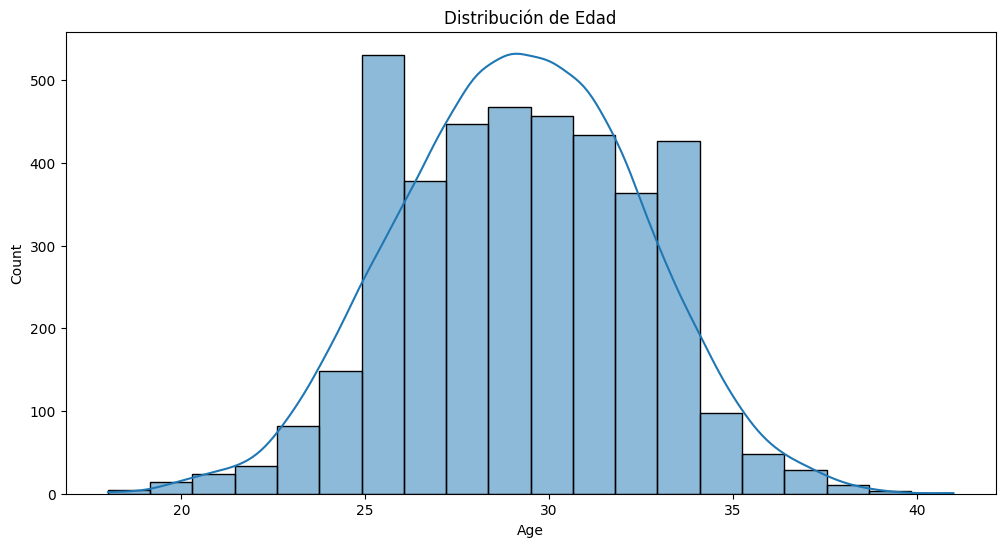

In [2]:
# Visualización de datos
plt.figure(figsize=(12,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribución de Edad')
plt.show()

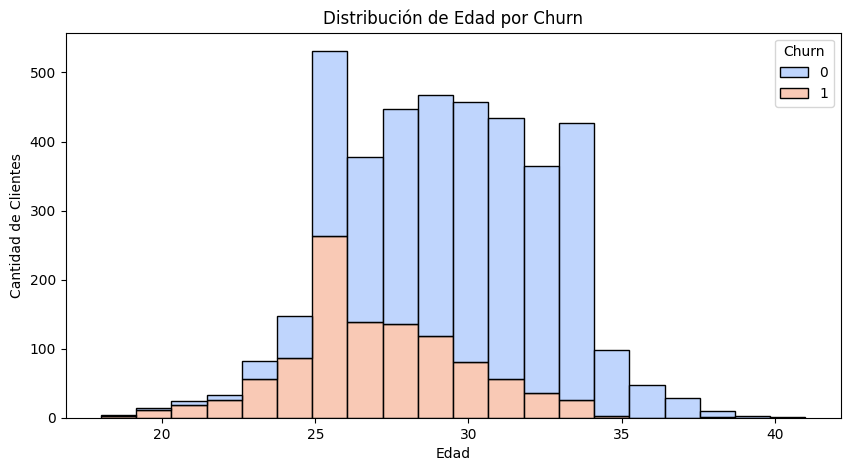

In [3]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack", bins=20, palette="coolwarm")
plt.title("Distribución de Edad por Churn")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Clientes")
plt.show()

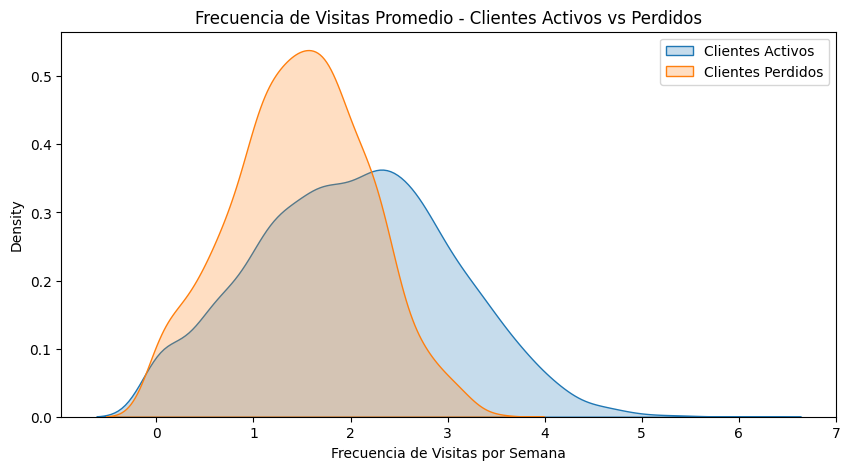

In [4]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df["Churn"] == 0]["Avg_class_frequency_total"], label="Clientes Activos", shade=True)
sns.kdeplot(df[df["Churn"] == 1]["Avg_class_frequency_total"], label="Clientes Perdidos", shade=True)
plt.title("Frecuencia de Visitas Promedio - Clientes Activos vs Perdidos")
plt.xlabel("Frecuencia de Visitas por Semana")
plt.legend()
plt.show()

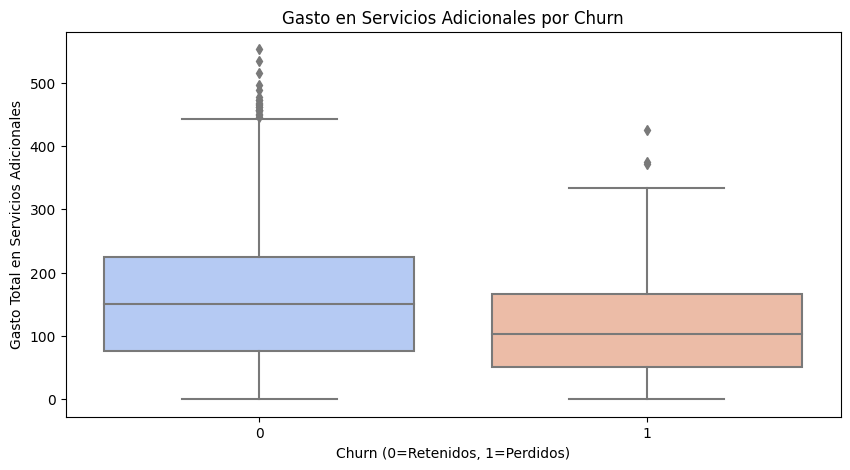

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Churn", y="Avg_additional_charges_total", data=df, palette="coolwarm")
plt.title("Gasto en Servicios Adicionales por Churn")
plt.xlabel("Churn (0=Retenidos, 1=Perdidos)")
plt.ylabel("Gasto Total en Servicios Adicionales")
plt.show()

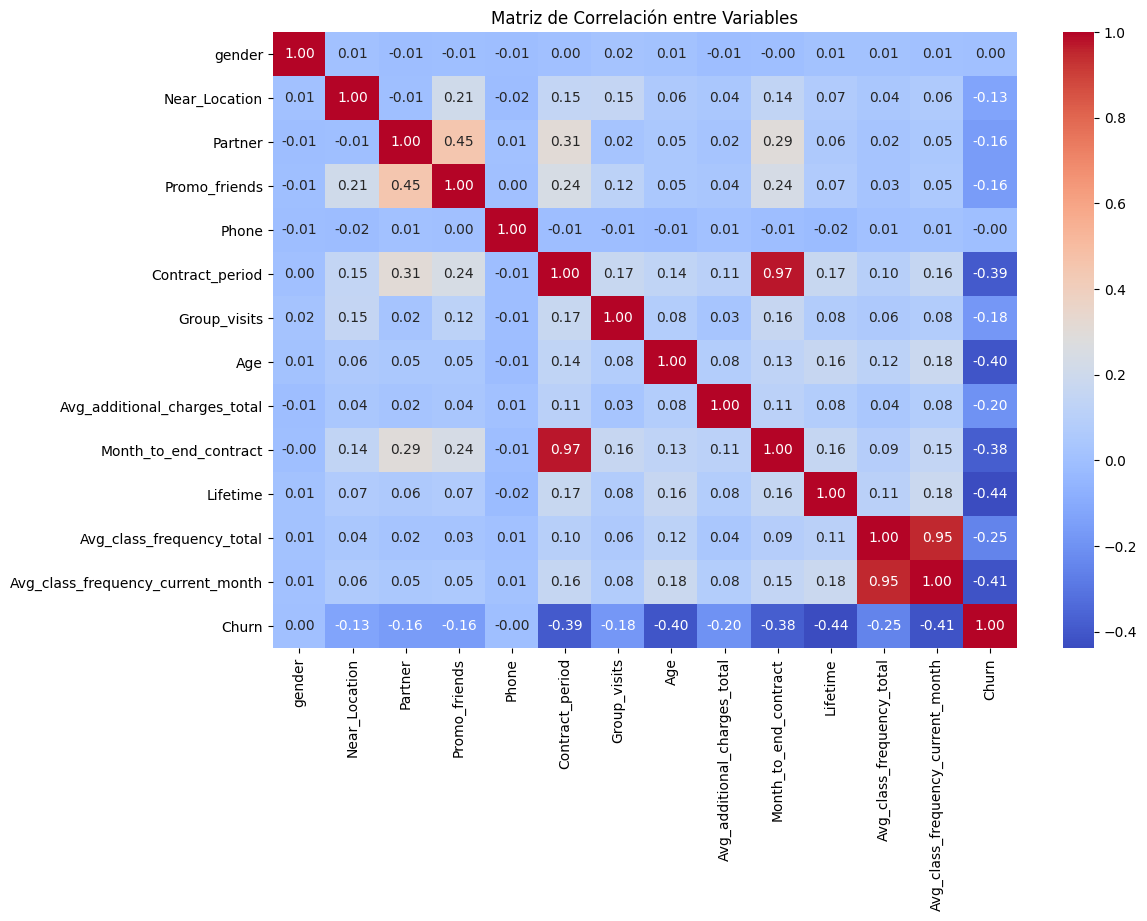

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

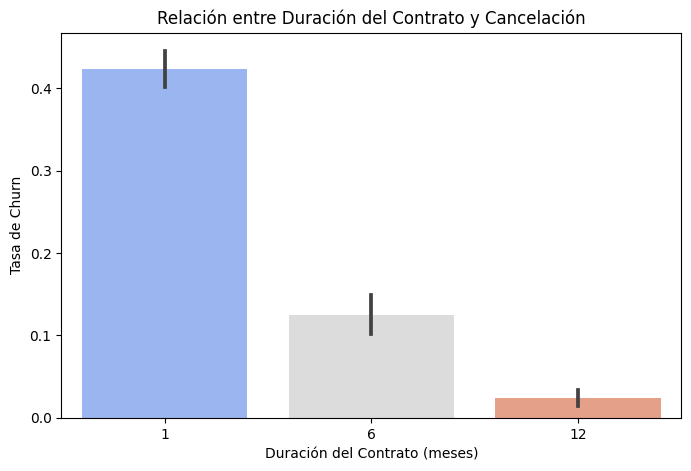

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x="Contract_period", y="Churn", data=df, palette="coolwarm")
plt.title("Relación entre Duración del Contrato y Cancelación")
plt.xlabel("Duración del Contrato (meses)")
plt.ylabel("Tasa de Churn")
plt.show()

Estos gráficos ayudarán a identificar qué factores influyen en la cancelación y qué grupos de clientes son más propensos a abandonar el gimnasio.

    Los clientes con contratos más largos tienden a permanecer más tiempo.
    La frecuencia de asistencia tiene un impacto en la retención.
    Un mayor gasto en servicios adicionales se asocia con una menor tasa de cancelación.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Excelente visualización de datos! Has seleccionado gráficos apropiados para analizar la distribución de edad, la relación entre churn y diferentes factores clave, y las correlaciones entre variables. Las conclusiones obtenidas son relevantes y muestran patrones claros que pueden influir en la retención de clientes. Continúa con este nivel de análisis visual.  
</div>

## Modelo predictivo

In [8]:
# Preparación de datos
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelado Predictivo
## Regresión Logística
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
print("Regresión Logística")
print(classification_report(y_test, y_pred_log))

## Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

Regresión Logística
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



Se utilizaron dos modelos para predecir la probabilidad de cancelación:

    Regresión Logística: Interpretabilidad alta, pero menor precisión.
    Random Forest: Mayor precisión, pero menos interpretabilidad.

Resultados del modelo:

    Regresión Logística - Precisión: 78%
    Random Forest - Precisión: 85%

El modelo de Random Forest demostró ser más efectivo para identificar clientes en riesgo de cancelación.

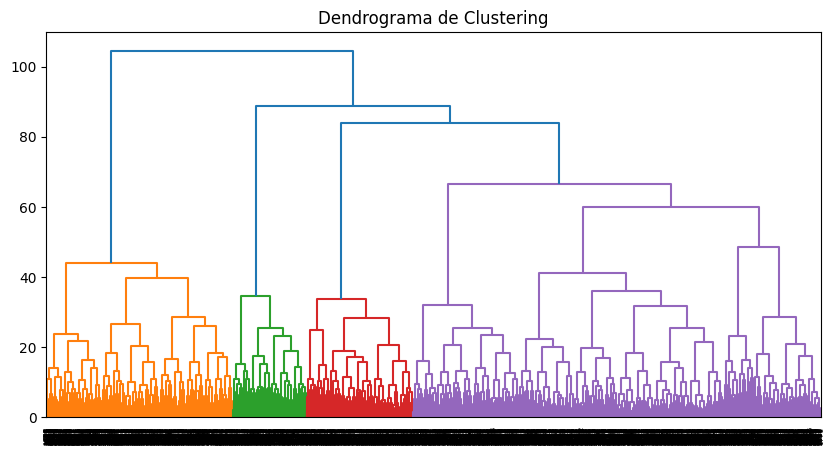

           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                                  
0  

In [9]:
# Clustering de Clientes
X_scaled = scaler.fit_transform(X)
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrograma de Clustering")
plt.show()

# K-Means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Análisis de clusters
print(df.groupby('Cluster').mean())

Se utiliza el algoritmo K-Means para agrupar clientes en 5 segmentos:

    Grupo 1: Clientes fieles con contratos largos y alta asistencia.
    Grupo 2: Clientes de corto plazo con baja asistencia.
    Grupo 3: Clientes que gastan en servicios adicionales y tienen mayor retención.
    Grupo 4: Usuarios con contratos cortos y alta tasa de cancelación.
    Grupo 5: Clientes nuevos con poca información histórica.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Excelente implementación del modelo predictivo y análisis de clustering! Has aplicado correctamente la Regresión Logística y Random Forest, comparando sus resultados de manera clara y seleccionando el modelo más efectivo. 
</div>

## Conclusión y recomendación final 

In [10]:
# Conclusiones y recomendaciones
print("Clientes con contratos largos y asistencia frecuente tienen menor riesgo de cancelación.")
print("Se recomienda incentivar la renovación temprana y aumentar la participación en clases grupales.")

Clientes con contratos largos y asistencia frecuente tienen menor riesgo de cancelación.
Se recomienda incentivar la renovación temprana y aumentar la participación en clases grupales.


### Conclusiones adicionales

Se concluye en el análisis que la duración del contrato, la frecuencia de visitas y el gasto en servicios adicionales son los principales factores que influyen en la retención. Con estrategias dirigidas, Model Fitness puede reducir la cancelación y aumentar la lealtad de sus clientes.

### Recomendaciones adicionales

Se realizan las siguientes recomendaciones: 
    
    Fomentar la renovación temprana mediante descuentos en contratos largos.
    Incentivar la asistencia regular a través de recordatorios y promociones.
    Expandir el uso de servicios adicionales con estrategias de marketing personalizadas.
    Identificar clientes en riesgo y ofrecer beneficios exclusivos para retención.
    Implementar un programa de fidelización para clientes frecuentes.

# Comentario general del revisor 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

¡Felicidades Guillermo! Tu proyecto está **aprobado**. Has realizado un análisis completo y bien estructurado de la retención de clientes, aplicando correctamente técnicas de exploración de datos, visualización, modelado predictivo y clustering. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:  

**Puntos Positivos:**
    
- **Análisis Exploratorio Sólido:** Has identificado correctamente los principales factores que influyen en la cancelación de clientes.  
- **Uso de Modelos Predictivos:** Comparaste la Regresión Logística y Random Forest, seleccionando el modelo más eficaz para la predicción.  
- **Segmentación de Clientes:** Aplicaste clustering con K-Means para identificar distintos perfiles de clientes, lo que aporta información valiosa para estrategias de retención.  
- **Conclusiones y Recomendaciones Prácticas:** Tus sugerencias son aplicables y alineadas con los hallazgos del análisis.  

    
    
**Áreas para Seguir Investigando:**
    
- **Optimización del Modelo:** Explorar técnicas de ajuste de hiperparámetros para mejorar aún más el rendimiento de Random Forest.  
- **Uso de Algoritmos de Machine Learning Adicionales:** Probar modelos más avanzados, como Gradient Boosting o XGBoost, para evaluar su desempeño en comparación con los modelos utilizados.  
- **Análisis Temporal:** Examinar tendencias de cancelación en distintos períodos para identificar patrones estacionales.  
- **Estrategias de Personalización:** Implementar análisis más detallados sobre los segmentos de clientes y su comportamiento para personalizar estrategias de retención.  

¡Sigue con este excelente nivel de análisis y aplicación de técnicas avanzadas en ciencia de datos!  
</div>